In [ ]:
batch_size = 64
num_classes = 10
epochs = 10

In [ ]:
# defining the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# text Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

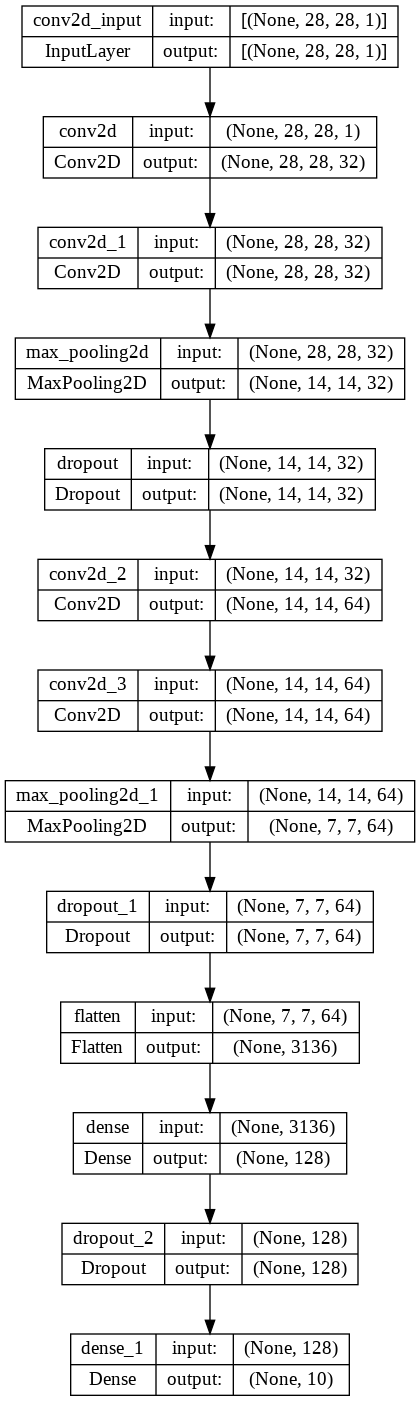

In [ ]:
# ploting the model architecture
plot_model(model, 'model.png', show_shapes=True)

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 19s 9ms/step - loss: 0.2198 - acc: 0.9316 - val_loss: 0.0408 - val_acc: 0.9887
Epoch 2/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0733 - acc: 0.9788 - val_loss: 0.0364 - val_acc: 0.9908
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0567 - acc: 0.9843 - val_loss: 0.0280 - val_acc: 0.9930
Epoch 4/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0500 - acc: 0.9855 - val_loss: 0.0270 - val_acc: 0.9932
Epoch 5/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0480 - acc: 0.9866 - val_loss: 0.0301 - val_acc: 0.9930
Epoch 6/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0479 - acc: 0.9870 - val_loss: 0.0350 - val_acc: 0.9910
Epoch 7/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0484 - acc: 0.9871 - val_loss: 0.0323 - val_acc: 0.9910
Epoch 8/10
844/844 [==============================] - 6s 7ms/step - loss: 0

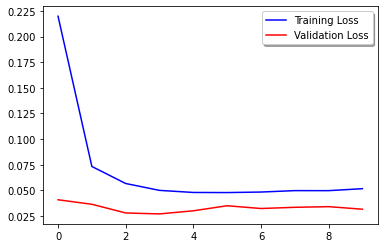

In [ ]:
# ploting the learning curves
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
ax.plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax.legend(loc='best', shadow=True)

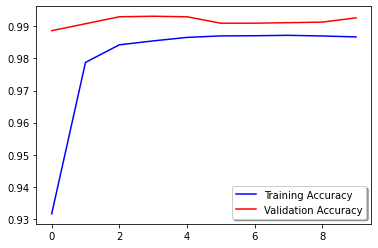

In [ ]:
# ploting the learning curves
fig, ax = plt.subplots(1,1)
ax.plot(history.history['acc'], color='b', label="Training Accuracy")
ax.plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax.legend(loc='best', shadow=True)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.2900013923645


In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def draw_output(idx_nums):
    plt.figure(figsize = (20, 20))
    plt.xticks( range(10) )
    x = np.ceil(np.sqrt(len(idx_nums)))
    cnt = 1
    for ph in idx_nums:
        plt.subplot(x, x, cnt)
        curr_photo = y_test[ph]
        
        plt.xlim(0, 10)
        plt.title("Digit: {0}\n idx: {1} ".format(np.argmax(y_test[ph]), ph), fontsize = 10) 
        plt.bar(range(10), y_pred[ph])
        
        cnt += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


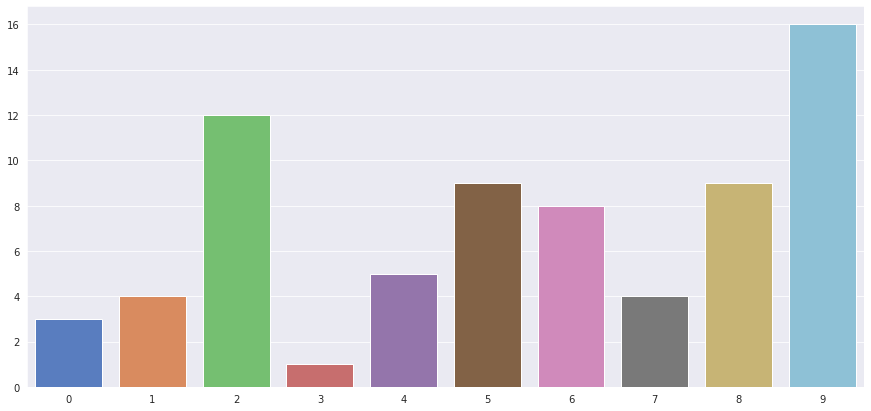

In [ ]:
cnt_error = []
for idx, (a, b) in enumerate(zip(y_test, y_pred)):
    if np.argmax(a) == np.argmax(b): continue
    cnt_error.append( (np.argmax(a)) )

cnt_error = np.unique(cnt_error, return_counts = True)
sns.set_style("darkgrid")
plt.figure(figsize = (15, 7))
bar_plot = sns.barplot(cnt_error[0], cnt_error[1], palette="muted")
plt.show()

ValueError: ignored

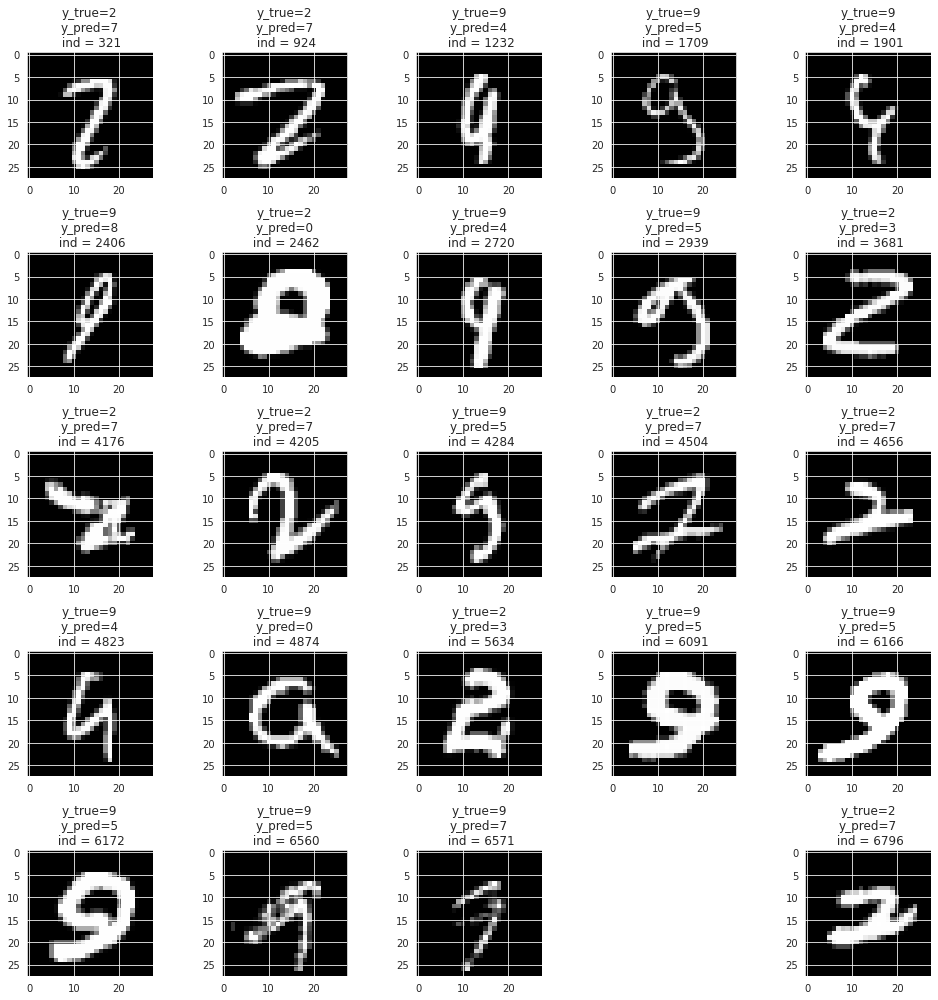

In [ ]:
cnt_ind = 1
list_idx = []
X_val_plot = x_test.reshape( x_test.shape[:-1] )
fig = plt.figure(figsize=(14, 14))

for idx, (a, b) in enumerate(zip(y_test, y_pred)):
    if np.argmax(a) == np.argmax(b): continue
    if (np.argmax(a) == 2 or np.argmax(a) == 9):    
        plt.subplot(5, 5, cnt_ind)
        plt.imshow(X_val_plot[idx], cmap='gray', interpolation='none')
        plt.title('y_true={0}\ny_pred={1}\n ind = {2}'.format(np.argmax(a), np.argmax(b), idx))
        plt.tight_layout()
        list_idx.append(idx)
        cnt_ind += 1

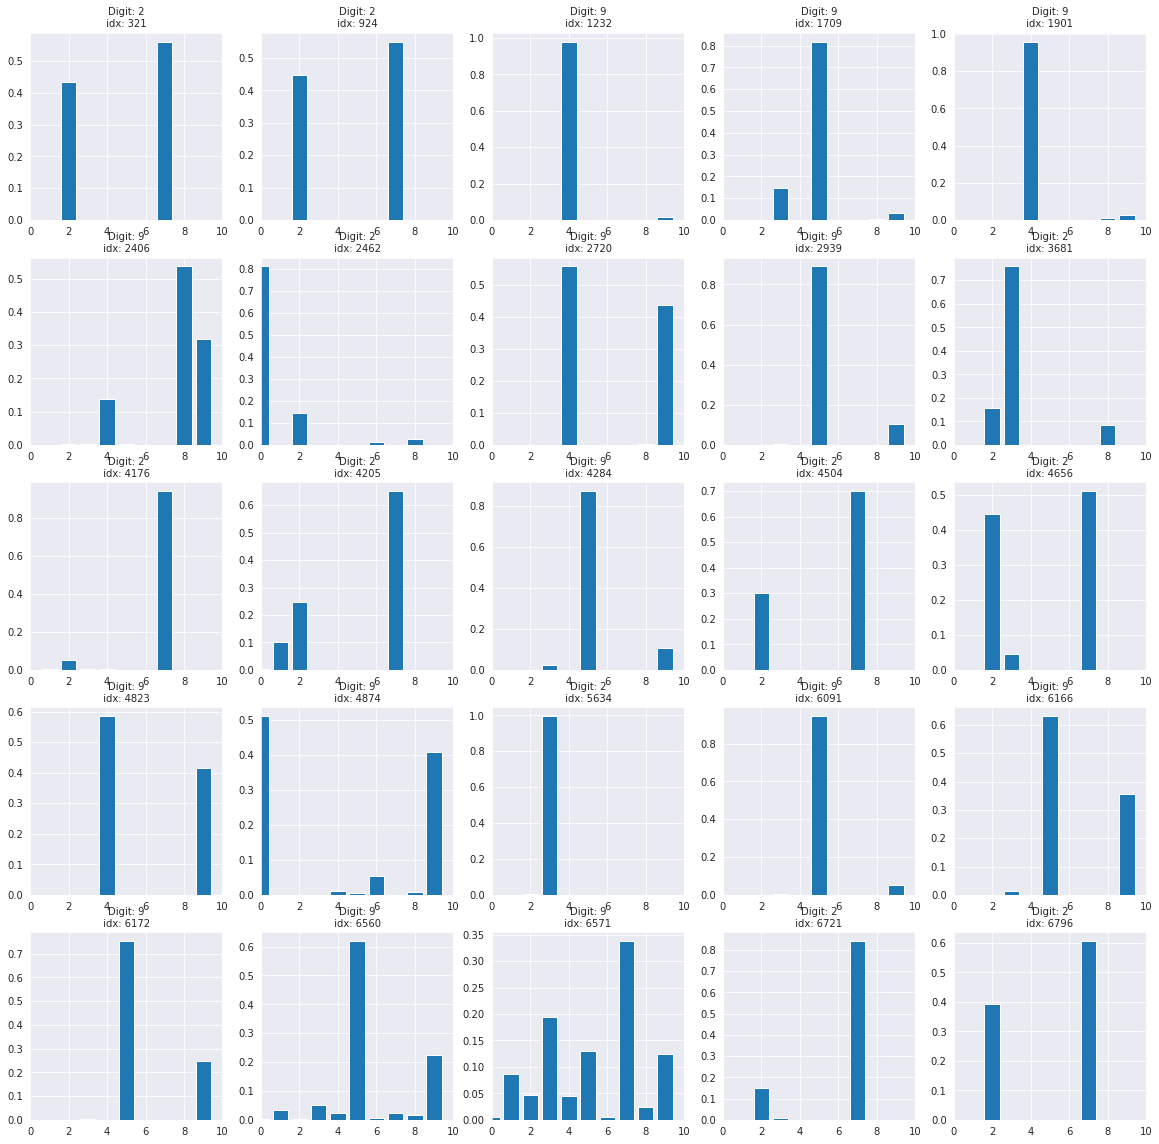

In [ ]:
draw_output(list_idx)

In [ ]:
image = x_train[0]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [ ]:
image.shape[0],image.shape[1],image.shape[2]

In [ ]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,input_shape[0],input_shape[1],input_shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(np.argmax(yhat)))

In [ ]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

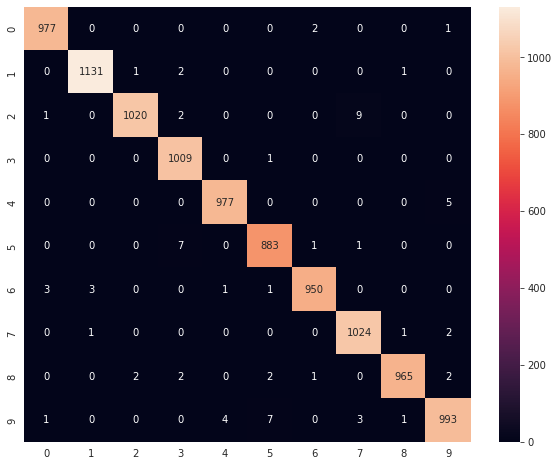

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [ ]:
model.save('hand_written_digits_CNN.h5')

In [ ]:
# Load the model
model = tf.keras.models.load_model('hand_written_digits_CNN.h5')

In [ ]:
image = x_test[100]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [ ]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,input_shape[0],input_shape[1],input_shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(np.argmax(yhat)))